# Import Libraries, Modules and read the Dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np   ### Support for large, multi-dimensional arrays and matrices. Has a large collection of high-level mathematical functions.
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_score
from time import time

dataset = pd.read_csv('FinalDataset.csv')

# See dataset

In [3]:
dataset.head()
#gives the first five rows of data

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Class
0,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Mirai_SYN
1,1.995653,74.0,0.000000e+00,1.997390,74.0,1.820000e-12,1.999129,74.0,0.000000e+00,1.999913,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Mirai_SYN
2,2.984032,74.0,0.000000e+00,2.990403,74.0,1.820000e-12,2.996795,74.0,9.090000e-13,2.999679,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Mirai_SYN
3,3.952494,74.0,0.000000e+00,3.971399,74.0,1.820000e-12,3.990434,74.0,0.000000e+00,3.999042,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Mirai_SYN
4,4.931439,74.0,9.090000e-13,4.958692,74.0,1.820000e-12,4.986173,74.0,9.090000e-13,4.998615,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Mirai_SYN


# Explore Features

In [4]:
dataset.info()# See the distribution of our target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39056 entries, 0 to 39055
Columns: 116 entries, MI_dir_L5_weight to Class
dtypes: float64(115), object(1)
memory usage: 34.6+ MB


In [5]:
dataset['Class'].value_counts()  #check whether it is a balanced dataset or an imbalanced dataset

Mirai_SYN    19528
Benign       19528
Name: Class, dtype: int64

In [6]:
#Get an idea about the actual data distribution
pd.options.display.float_format = '{:20,.3f}'.format
dataset.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,"39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000",...,"39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000","39,056.000"
mean,70.569,145.774,151.178,113.910,145.738,203.423,330.944,147.771,928.338,"3,029.858",...,"2,182.203",-24.576,-0.000,5.467,146.028,2.912,191.321,"2,759.261",-133.272,-0.011
std,72.909,119.313,"1,770.355",115.984,119.088,"1,982.480",332.315,116.868,"2,945.813","3,041.787",...,"16,463.431","2,001.900",0.038,15.334,118.702,16.897,179.734,"22,582.172","4,793.291",0.107
min,1.000,60.000,0.000,1.000,60.000,0.000,1.000,60.000,0.000,1.000,...,0.000,"-37,601.681",-0.587,1.000,60.000,0.000,60.000,0.000,"-68,855.092",-1.138
25%,1.000,67.488,0.000,1.000,68.537,0.000,1.062,70.547,0.107,2.768,...,0.000,0.000,0.000,1.000,60.000,0.000,74.000,0.000,0.000,0.000
50%,21.300,72.242,4.996,21.641,71.610,14.184,22.570,71.586,34.982,49.960,...,0.000,0.000,0.000,1.000,74.000,0.000,74.000,0.000,0.000,0.000
75%,136.877,330.000,37.087,224.669,330.000,38.027,662.818,329.999,42.857,"6,201.298",...,0.000,0.000,0.000,6.275,330.000,0.000,431.490,0.000,0.000,0.000
max,251.405,670.000,"83,290.214",354.414,670.000,"89,354.113",828.257,669.565,"92,557.424","6,546.597",...,"480,808.295","69,895.058",0.707,148.749,670.000,220.179,"1,265.998","454,622.861","143,864.111",1.299


In [7]:
#Check whether there are null values
dataset.columns[dataset.isna().any()].tolist()
# dataset.isnull().sum()

## Fill any null values with the Mean value of that feature. Should make sure that null is not a acceptable value for that feature.
# dataset['MI_dir_L5_weight'].fillna(dataset['MI_dir_L5_weight'].mean(), inplace=True)

[]

In [8]:
#check for duplicates
# Select duplicate rows except first occurrence based on all columns
duplicates = dataset[dataset.duplicated()]
print(duplicates.count())

#Keep the first occurance 
# dataset.duplicated(subset=None, keep='first')

MI_dir_L5_weight         1592
MI_dir_L5_mean           1592
MI_dir_L5_variance       1592
MI_dir_L3_weight         1592
MI_dir_L3_mean           1592
                         ... 
HpHp_L0.01_magnitude     1592
HpHp_L0.01_radius        1592
HpHp_L0.01_covariance    1592
HpHp_L0.01_pcc           1592
Class                    1592
Length: 116, dtype: int64


# Split into train, validation, and test set

In [34]:
#shuffle the dataset
dataset = dataset.reindex(np.random.permutation(dataset.index))

In [35]:
#Separate Features and Labels
features = dataset.drop('Class', axis=1)
# features = dataset.iloc[:,50:80] #We can slice the dataframe and test with different feature combinations.
labels = dataset['Class']

In [36]:
features.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
928,149.357,69.748,41.574,252.186,69.819,41.145,697.081,70.212,38.725,"5,205.199",...,0.000,0.000,0.000,1.000,74.000,0.000,74.000,0.000,0.000,0.000
3990,166.378,69.866,41.559,257.930,70.604,37.246,703.393,70.813,35.946,"5,679.368",...,0.000,0.000,0.000,1.000,60.000,0.000,60.000,0.000,0.000,0.000
1121,103.387,72.848,14.832,199.026,72.060,23.443,655.678,71.119,32.069,"5,222.787",...,0.000,0.000,0.000,1.000,74.000,0.000,74.000,0.000,0.000,0.000
2547,57.268,73.328,8.960,107.428,72.139,22.589,482.231,70.960,33.324,"5,325.119",...,0.000,0.000,0.000,1.000,74.000,0.000,74.000,0.000,0.000,0.000
18212,185.116,66.551,48.809,275.912,67.944,48.175,713.470,69.604,42.516,"6,478.103",...,0.000,0.000,0.000,1.000,60.000,0.000,60.000,0.000,0.000,0.000


In [37]:
labels.head()

928      Mirai_SYN
3990     Mirai_SYN
1121     Mirai_SYN
2547     Mirai_SYN
18212    Mirai_SYN
Name: Class, dtype: object

In [38]:
#Split the dataset in to Training, Validation and Test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# 4:3:3 = test 0.6, test 0.5
# 3:1:1 = test 0.4, test 0.5
# 8:1:1 = test 0.2, test 0.5


# Fit and evaluate DT model with default values and use 5-fold Cross-Validation 

In [39]:
clf = DecisionTreeClassifier()
start = time()
clf0 = clf.fit(X_train, y_train)
y_pred0 = clf0.predict(X_val)
end = time()
print(y_pred0)
print('Training Latency: {}ms'.format(round((end - start)*1000, 1)))

['Benign' 'Mirai_SYN' 'Benign' ... 'Mirai_SYN' 'Mirai_SYN' 'Benign']
Training Latency: 260.3ms


For performance evaluation, we use the following 3 standard metrics; Accuracy, TruePositive Rate (TPR)/ Recall, Precision, and which are defined as follows.

    Accuracy = Number of correct predictions / Total Number of samples
    (𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)

;
TPR/Recall = Number of True positives / Number of Actual Positives
𝑇𝑃/(𝑇𝑃+𝐹𝑁)
;
Precision = Number of True Positives / Number of All Positives
𝑇𝑃/(𝑇𝑃+𝐹𝑃)

    ;

where 𝑇𝑃
, 𝐹𝑁, 𝐹𝑃, and 𝑇𝑁 denotes True Positives, False Negatives, False Positives, and True Negatives respectively.

In [40]:
#Evaluate the Model using Accuracy, Precision, Recall, Latency
def evaluate_model(model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, pos_label='Mirai_SYN'), 3)  # True Positives/All Positives (TP+FN)
    recall = round(recall_score(labels, pred, pos_label='Mirai_SYN'), 3)  # True positives/ Actual positives (TP+FN)
      
    print('max_depth: {} -- Accuracy: {} / Precision: {} / Recall: {} / Prediction Latency: {}ms'.format(model.max_depth,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))
    confusionMatrix = confusion_matrix(labels, pred)
    print(confusionMatrix)

In [41]:
evaluate_model(clf0, X_val, y_val)

tree nodes: None -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 6.5ms
[[3928    0]
 [   0 3884]]


In [42]:
##Using Cross Validation
scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=5)
print ('Mean: {}, Std: {}'.format(scores.mean(),scores.std()))

Mean: 0.9999573287817366, Std: 8.534243652658091e-05


# Hyperparameter tuning


In [43]:
#Trying with different hyperparameters
clf1 = DecisionTreeClassifier(max_depth=1)
clf1.fit(X_train, y_train.values.ravel())

clf5 = DecisionTreeClassifier(max_depth=5)
clf5.fit(X_train, y_train.values.ravel())

clf10 = DecisionTreeClassifier(max_depth=10)
clf10.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(max_depth=10)

In [44]:
for mdl in [clf1, clf5, clf10]:
    evaluate_model(mdl, X_val, y_val)

tree nodes: 1 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 0.999 / Prediction Latency: 5.0ms
[[3928    0]
 [   2 3882]]
tree nodes: 5 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 4.3ms
[[3928    0]
 [   0 3884]]
tree nodes: 10 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 5.7ms
[[3928    0]
 [   0 3884]]


# Evaluate the best model on the test set

In [45]:
evaluate_model(clf1, X_test, y_test)

tree nodes: 1 -- Accuracy: 0.999 / Precision: 1.0 / Recall: 0.999 / Prediction Latency: 6.5ms
[[3932    0]
 [   4 3875]]


# Grid Search Technique

In [46]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [47]:
#Using Grid Search CV
dtGridCV = DecisionTreeClassifier()
parameters = {
    'max_depth' : [1,5,10]
}

cv = GridSearchCV(dtGridCV, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 5}

1.0 (+/-0.0) for {'max_depth': 1}
1.0 (+/-0.0) for {'max_depth': 5}
1.0 (+/-0.0) for {'max_depth': 10}


In [48]:
#Get the model with the best hyperparameters and evaluate on the Test set. 
#Also, if there are lots of models you can select the best ones and evaluate them on the validation set to select the best one.
evaluate_model(cv.best_estimator_, X_test, y_test)

tree nodes: 5 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 5.5ms
[[3932    0]
 [   0 3879]]


# Plot ROC Curve

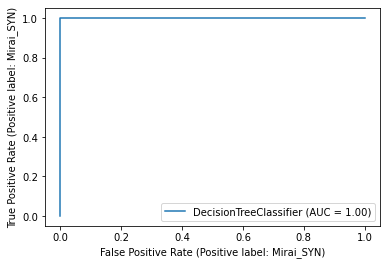

In [49]:
plot_roc_curve(cv.best_estimator_, X_test, y_test)
plt.show() 